In [19]:

import pandas as pd

weather_df = pd.read_csv('./data/weather.csv')
weather_df.head(10)

,Temperature(C),Humidity,Pressure(millibars),Wind Speed(km/h),If Rain
0,14.966667,0.42,1005.13,12.7512,1
1,17.222222,0.31,1004.70,11.2700,1
2,17.777778,0.28,1004.30,11.2700,1
3,17.827778,0.30,1003.92,12.5902,1
4,18.888889,0.28,1003.10,12.8800,1
5,19.016667,0.26,1002.40,14.8764,0
6,18.022222,0.27,1001.95,14.4417,1
7,17.850000,0.28,1001.79,13.7977,0
8,16.322222,0.32,1001.60,10.8192,0
9,14.077778,0.39,1001.90,9.2897,1


In [31]:
"""
以经典的逻辑回归为例预测是否下雨。
"""


from sklearn.linear_model import LogisticRegression  # 导入逻辑回归模型

x = weather_df.drop('If Rain', axis=1)  # 特征x
y = weather_df['If Rain']  # 标签y

lr = LogisticRegression()
lr.fit(x, y)  # 模型训练

print("前10个样本预测结果：",lr.predict(x[0:10]) ) # 模型预测前10个样本并输出结果

前10个样本预测结果： [1 1 1 1 1 1 0 1 1 1]


In [30]:
"""
以经典的线性回归预测湿度情况。
"""

from sklearn.linear_model import LinearRegression  #导入线性回归模型

x = weather_df.drop('Humidity', axis=1)  # 特征x
y = weather_df['Humidity']  # 标签y

linear = LinearRegression()
linear.fit(x, y)  # 模型训练

print("前10个样本预测结果：",linear.predict(x[0:10]) ) # 模型预测前10个样本并输出结果

前10个样本预测结果： [0.42053525 0.32811401 0.31466161 0.3238797  0.29984453 0.29880059
 0.37732988 0.37445159 0.45466224 0.56887242]


In [37]:
linear.coef_

array([-0.04747381, -0.03230485, -0.00051815,  0.01655681])

前10个样本聚类结果： [1 1 1 1 1 1 1 1 1 1]


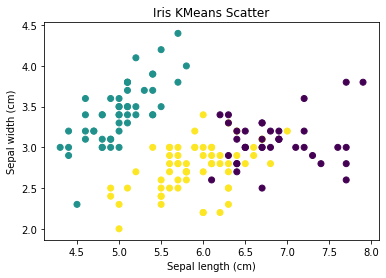

In [35]:
"""
聚类

"""
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans  # 导入Kmeans模型
import matplotlib.pyplot as plt


lris_df = datasets.load_iris()  # 加载iris鸢尾花数据集，数据集有150条样本，分三类的iris品种
x = lris_df.data

k = 3  # 聚类出k个簇类, 已知数据集有三类品种, 设定为3
model = KMeans(n_clusters=k)  
model.fit(x)  # 训练模型
 
print("前10个样本聚类结果：",model.predict(x[0:10]) ) # 模型预测前10个样本并输出聚类结果：[1 1 1 1 1 1 1 1 1 1] 

# 样本的聚类效果以散点图展示
x_axis = lris_df.data[:,0] # 以iris花的sepal length (cm)特征作为x轴
y_axis = lris_df.data[:,1] # 以iris花的sepal width (cm)特征作为y轴
plt.scatter(x_axis, y_axis, c=model.predict(x))
plt.xlabel('Sepal length (cm)')#设定x轴注释
plt.ylabel('Sepal width (cm)')#设定y轴注释
plt.title('Iris KMeans Scatter')
plt.show()

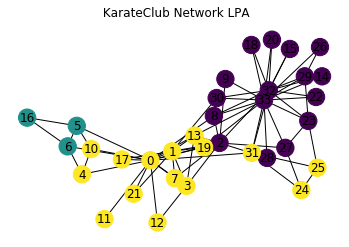

In [5]:
"""
标签传播算法
"""
import networkx as nx # 导入networkx图网络库
import matplotlib.pyplot as plt
from networkx.algorithms import community  # 图社区算法

G=nx.karate_club_graph()   # 加载美国空手道俱乐部图数据
lpa = community.label_propagation_communities(G)  # 标签传播算法

community_index = {n: i for i, com in enumerate(lpa) for n in com} # 各标签对应的节点
node_color = [community_index[n] for n in G]  # 以标签作为节点颜色
pos = nx.spring_layout(G)  # 节点的布局为spring型
nx.draw_networkx_labels(G, pos) # 节点序号
nx.draw(G, pos, node_color=node_color) # 分标签颜色展示图网络
plt.title(' KarateClub Network LPA')
plt.show()